# Model building, Evaluation & Evaluaton
**Working on Cleaned dataset**

In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [19]:
# import the cleaned dataset
# Load the dataset using the custom data loader function
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("Supply Chain Quality Control Data Loader").getOrCreate()

from pyspark.sql import SparkSession

# Specify the file path to the dataset
file_path = "df_cleaned.csv"

# Create a SparkSession
spark = SparkSession.builder.appName("Supply Chain Quality Control Data Loader").getOrCreate()

# Load the CSV file into a DataFrame
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Display the schema of the dataset
print("\n=== Data Schema ===")
df.printSchema()


=== Data Schema ===
root
 |-- Ordered Quantity: double (nullable = true)
 |-- Shipped Quantity: double (nullable = true)
 |-- Illustrative Price: double (nullable = true)
 |-- Average Days Late: double (nullable = true)
 |-- On Time (OTD): double (nullable = true)
 |-- In Full (IFD): double (nullable = true)
 |-- Delivery Progress: double (nullable = true)
 |-- Estimated Lead Time in Days: double (nullable = true)
 |-- Number of Shipments: double (nullable = true)
 |-- Order Cycle Time: double (nullable = true)



In [21]:
# Select the first 10 columns
first_10_columns = df.columns[:10]  # Adjusted to get the first 10 columns, not 20:30

# Select those columns from the DataFrame
selected_df = df.select(first_10_columns)

# Show the first 10 records of the selected features
print("\n=== First 10 Records of Relevant Features ===")
selected_df.show(10)


=== First 10 Records of Relevant Features ===
+----------------+----------------+------------------+-----------------+-------------+-------------+-----------------+---------------------------+-------------------+----------------+
|Ordered Quantity|Shipped Quantity|Illustrative Price|Average Days Late|On Time (OTD)|In Full (IFD)|Delivery Progress|Estimated Lead Time in Days|Number of Shipments|Order Cycle Time|
+----------------+----------------+------------------+-----------------+-------------+-------------+-----------------+---------------------------+-------------------+----------------+
|            15.0|            15.0|             25.75|             30.0|        100.0|        100.0|              2.0|         161.94305269017912|                1.0|            91.0|
|           210.0|           210.0|             137.0|              4.0|        100.0|        100.0|              2.0|                      140.0|                1.0|           501.0|
|            26.0|            26.

**Correlation Matrix**

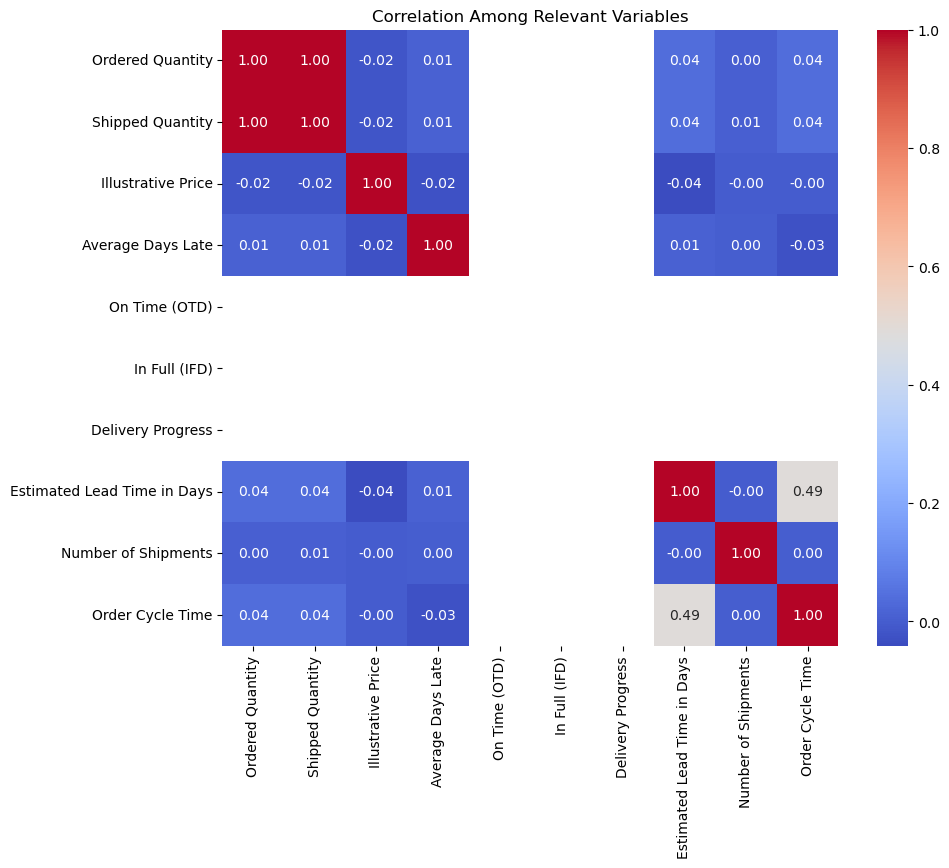

In [33]:
pandas_df = selected_df.toPandas()

# Compute correlation matrix
correlation_matrix = pandas_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Among Relevant Variables')
plt.show()

In [10]:
!pip install --upgrade tensorflow
import nest_asyncio
nest_asyncio.apply()

^C


# Identify Suitable Algorithms

Given the dataset above and project objectives, the following algorithms and corresponding models are suitable:

1. **Linear Regression Model**
  
3. **Random Forest Regressor**

4. **Gradient Boosting Regressor**

5. **Neural Network Evaluation Graphs**


=== Model Selection ===
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. Neural Network
5. Compare All Models
6. Quit


Choose a model (1-6):  1


Linear Regression Results
Mean Absolute Error: 85.64
R^2 Score: 0.24


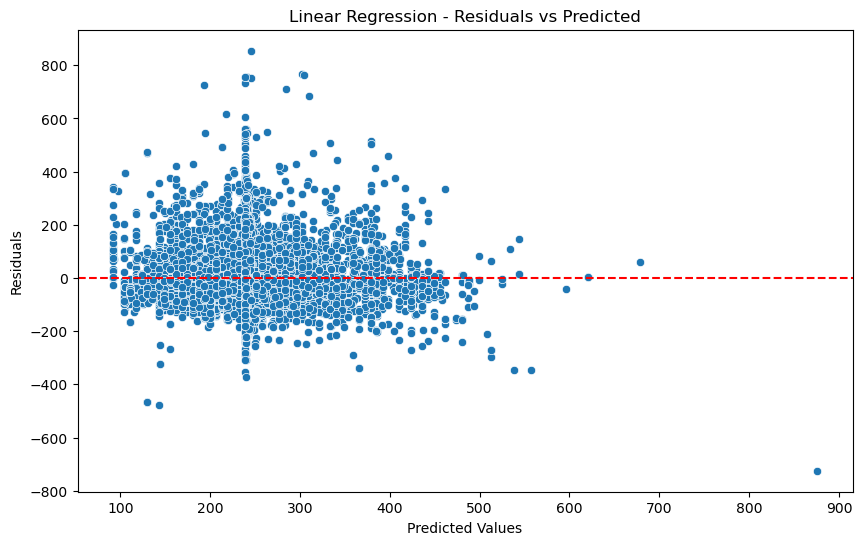

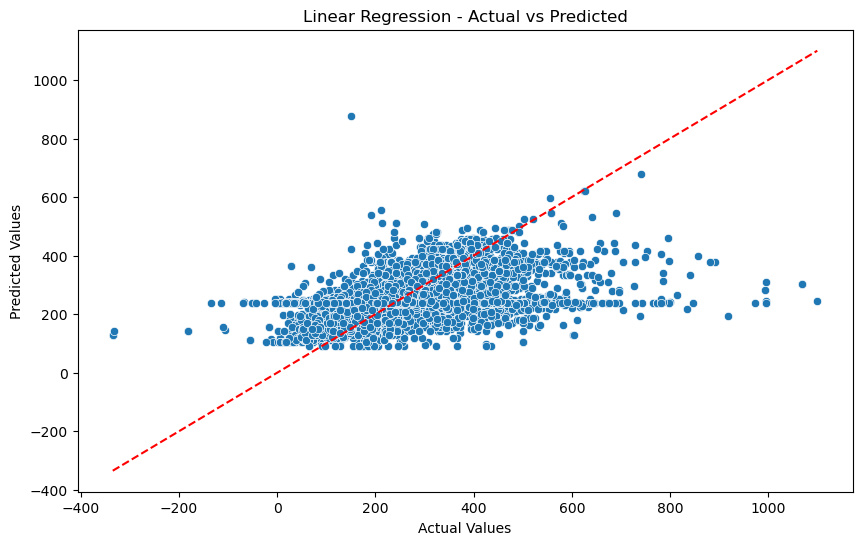


=== Model Selection ===
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. Neural Network
5. Compare All Models
6. Quit


Choose a model (1-6):  2


Random Forest Regressor Results
Mean Absolute Error: 63.57
R^2 Score: 0.51


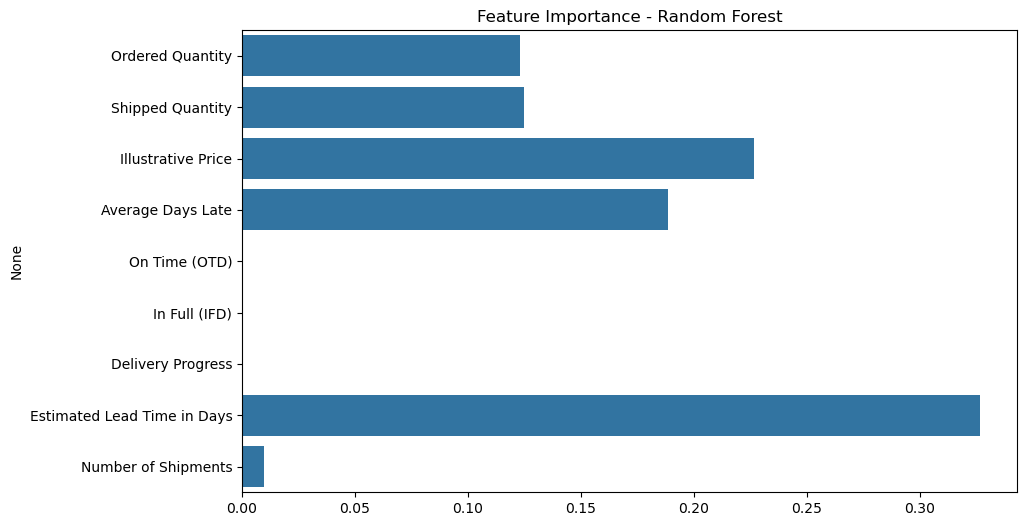

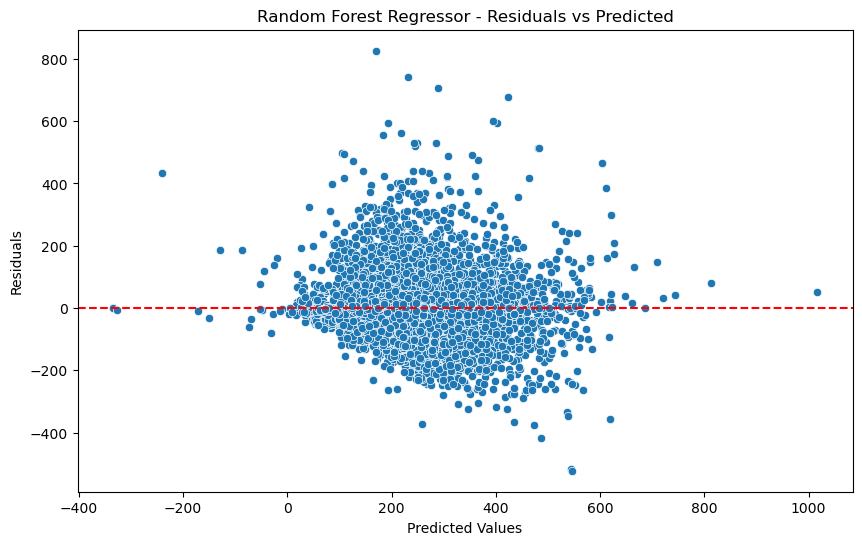

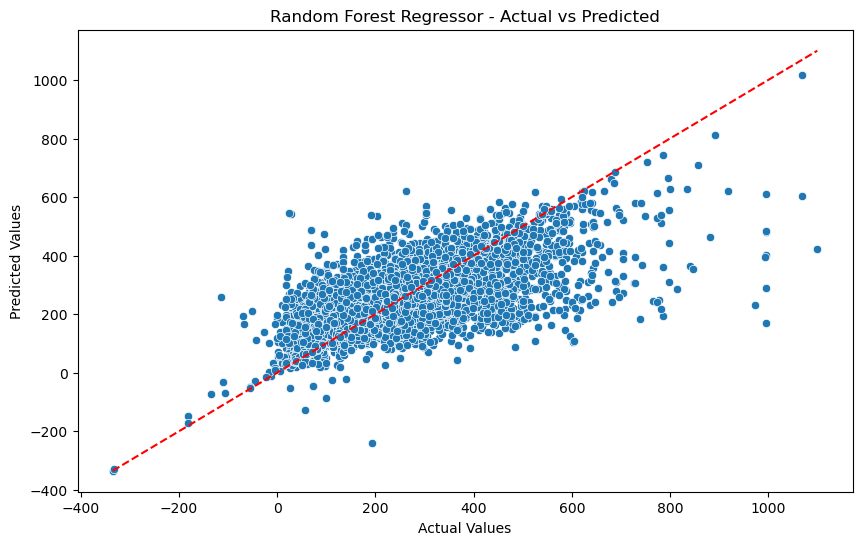


=== Model Selection ===
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. Neural Network
5. Compare All Models
6. Quit


Choose a model (1-6):  3


Gradient Boosting Regressor Results
Mean Absolute Error: 78.57
R^2 Score: 0.35


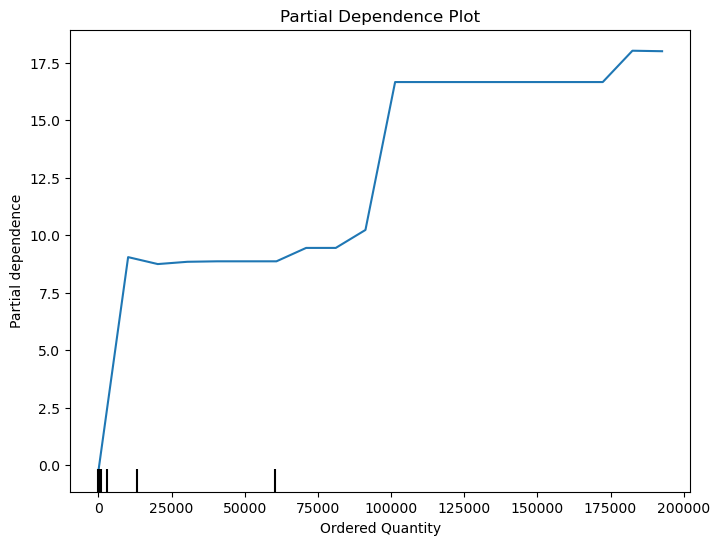

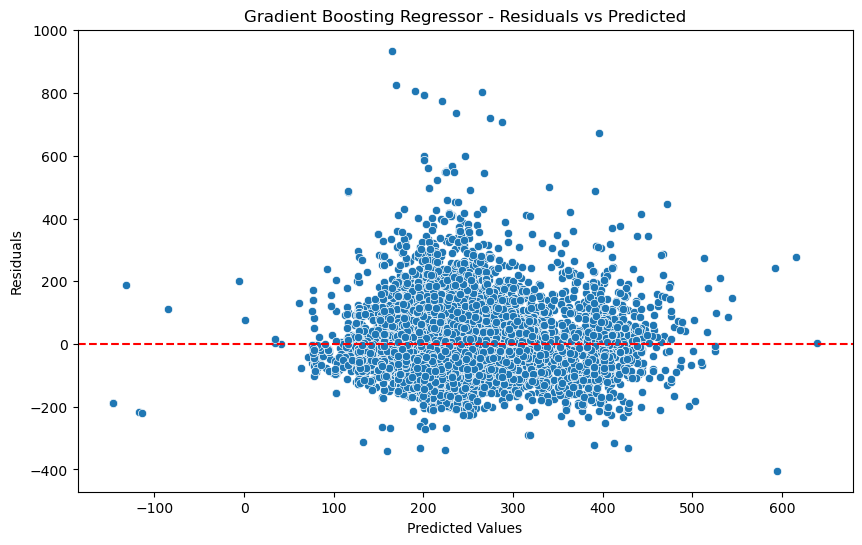

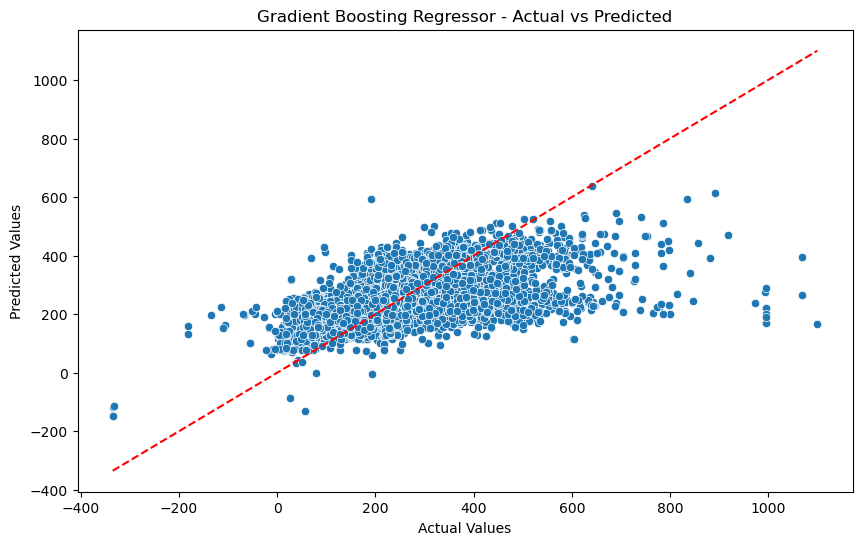


=== Model Selection ===
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. Neural Network
5. Compare All Models
6. Quit


Choose a model (1-6):  4


264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Results
Mean Absolute Error: 104.60
R^2 Score: -0.16


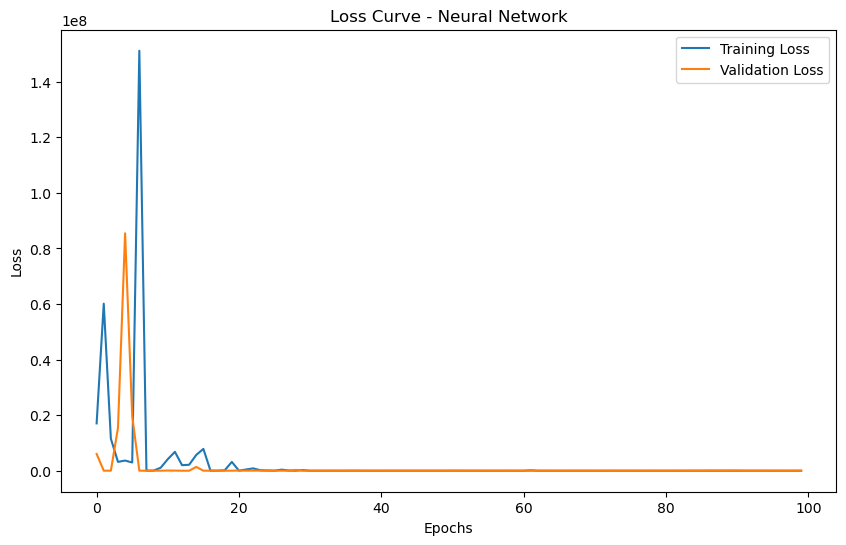

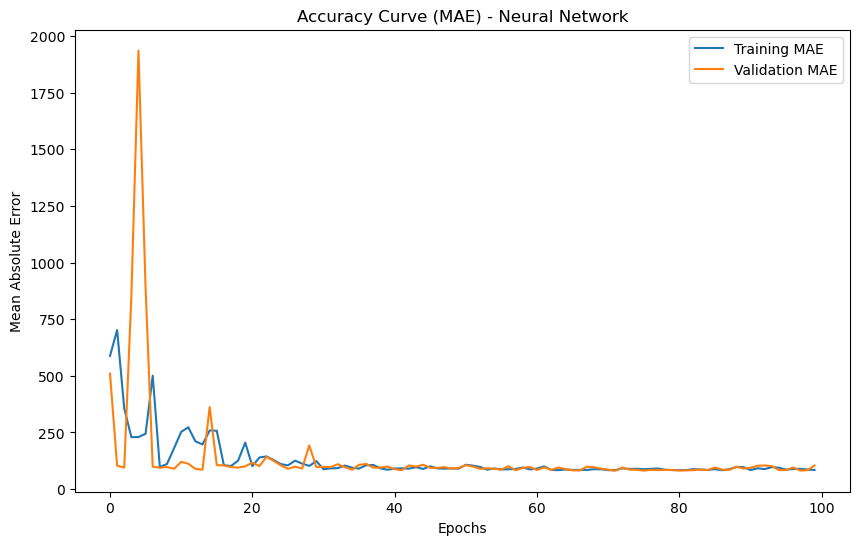

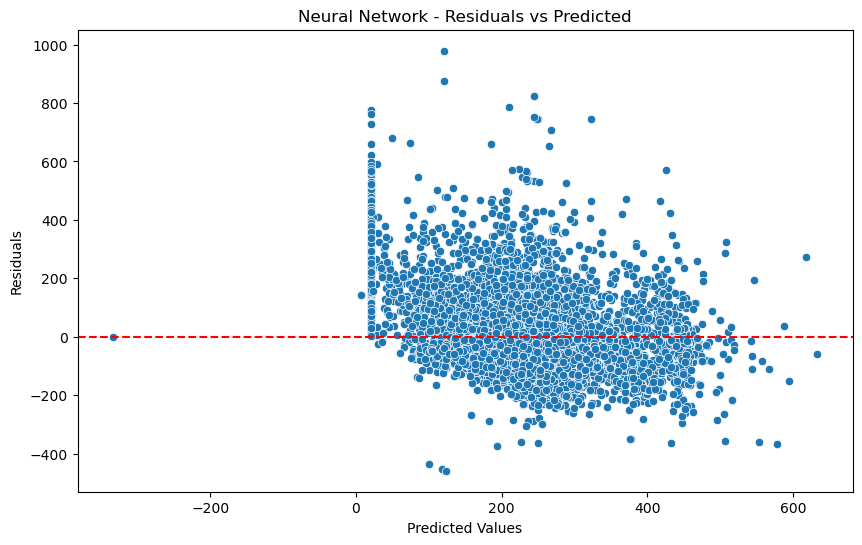

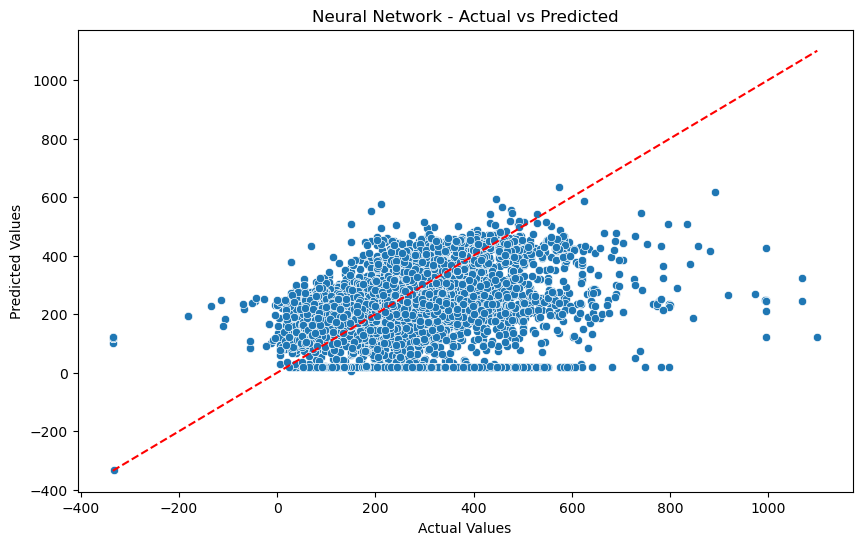


=== Model Selection ===
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. Neural Network
5. Compare All Models
6. Quit


Choose a model (1-6):  5


Linear Regression Results
Mean Absolute Error: 85.64
R^2 Score: 0.24


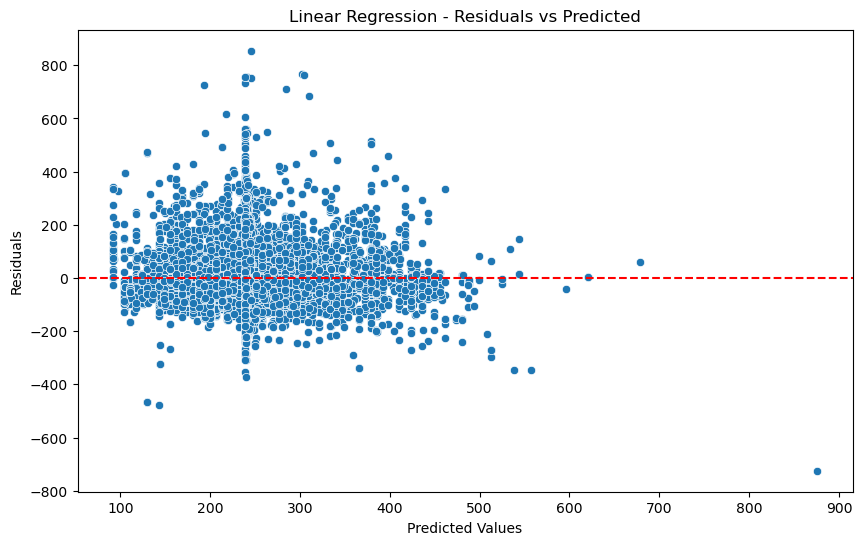

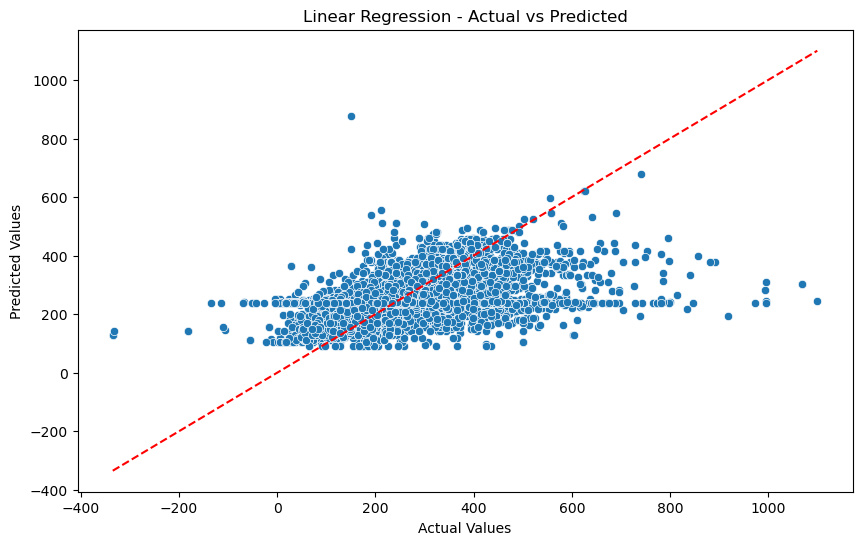

Random Forest Regressor Results
Mean Absolute Error: 63.57
R^2 Score: 0.51


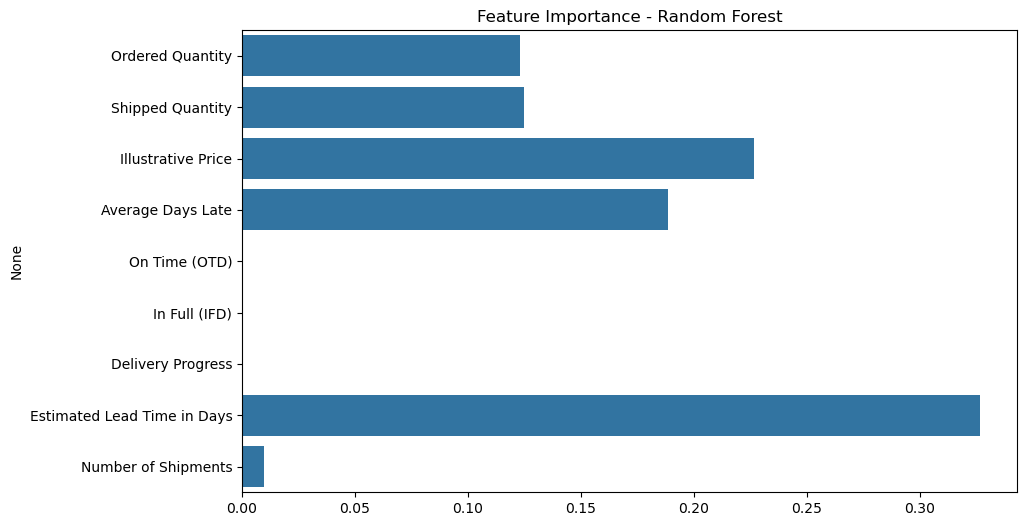

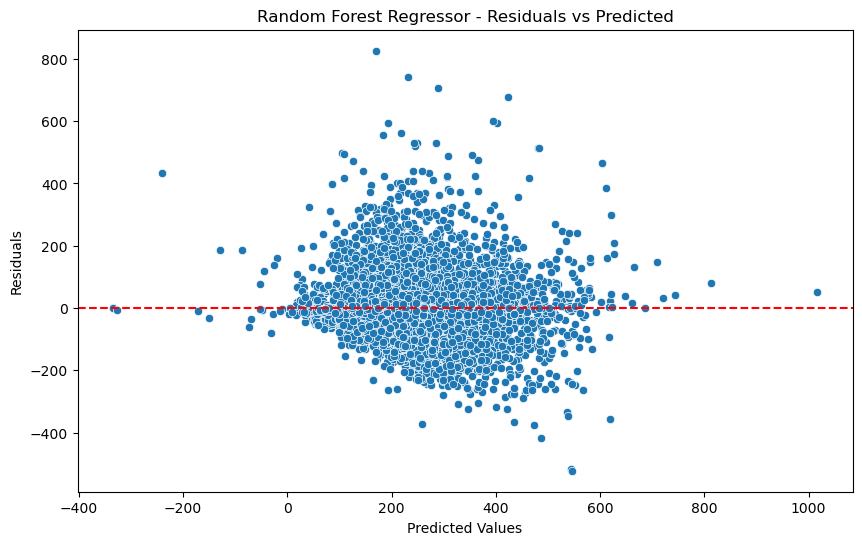

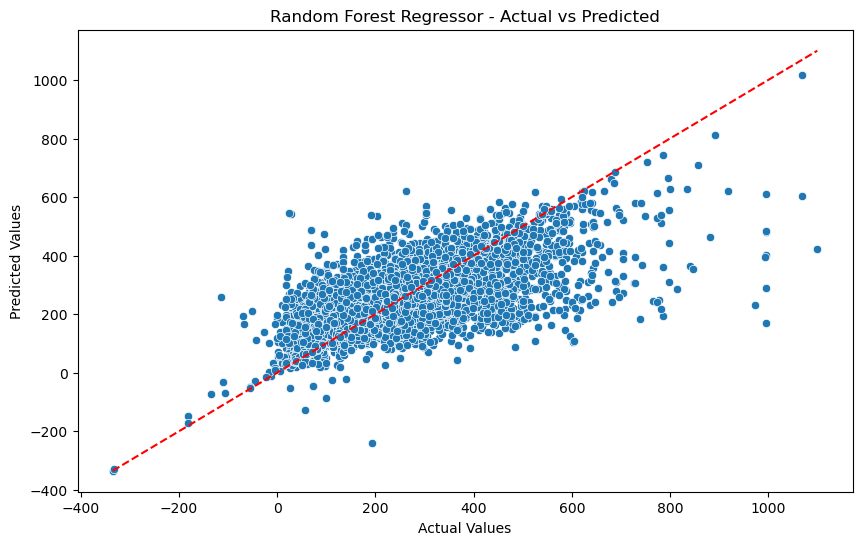

Gradient Boosting Regressor Results
Mean Absolute Error: 78.57
R^2 Score: 0.35


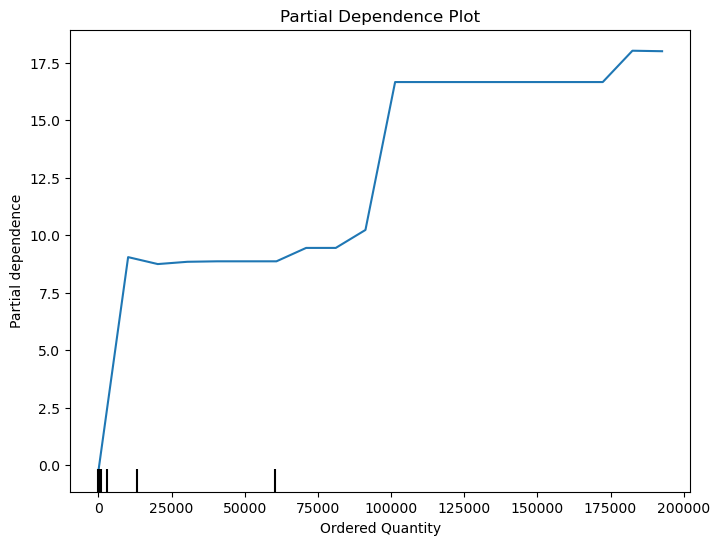

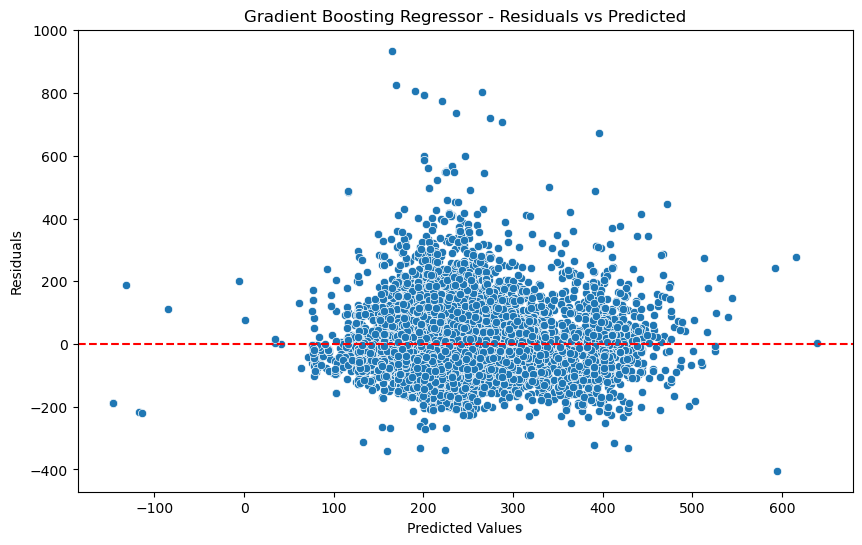

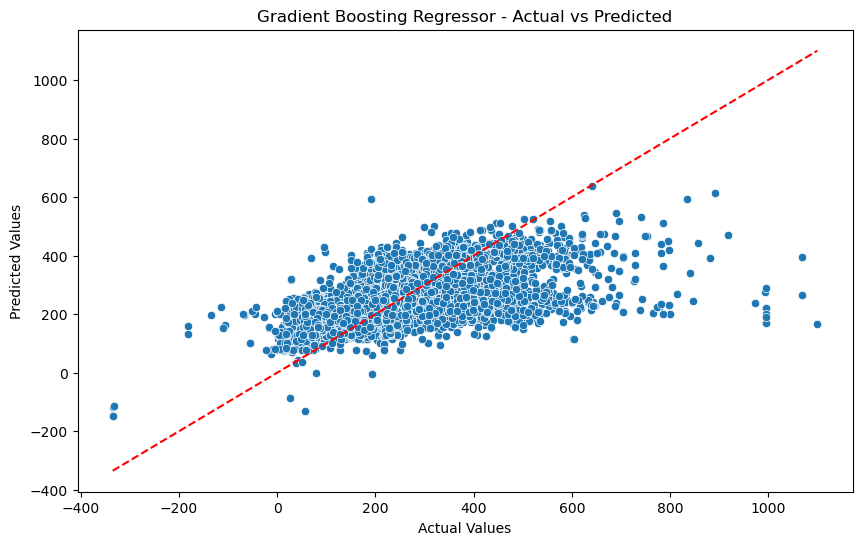

264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Neural Network Results
Mean Absolute Error: 93.67
R^2 Score: 0.01


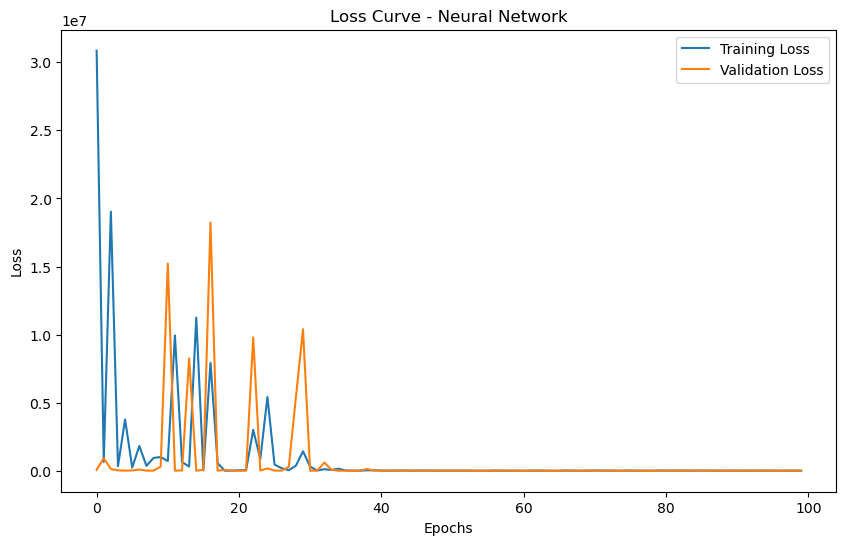

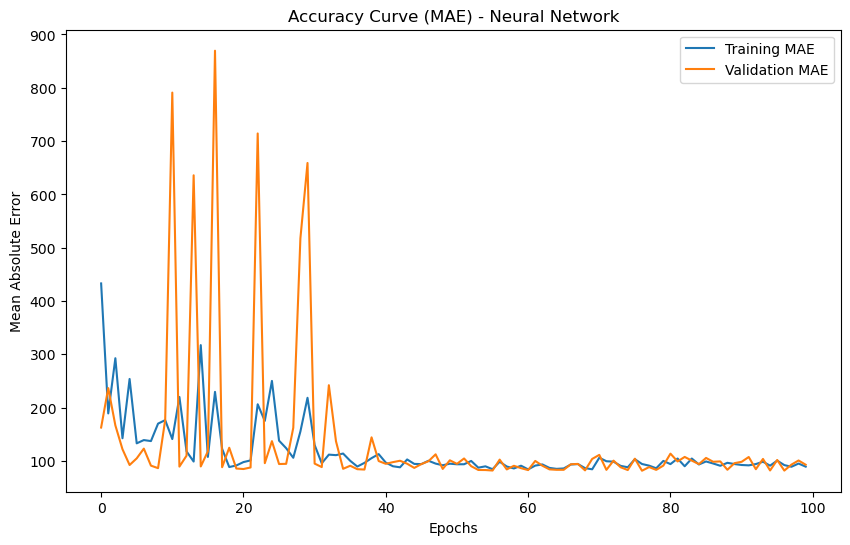

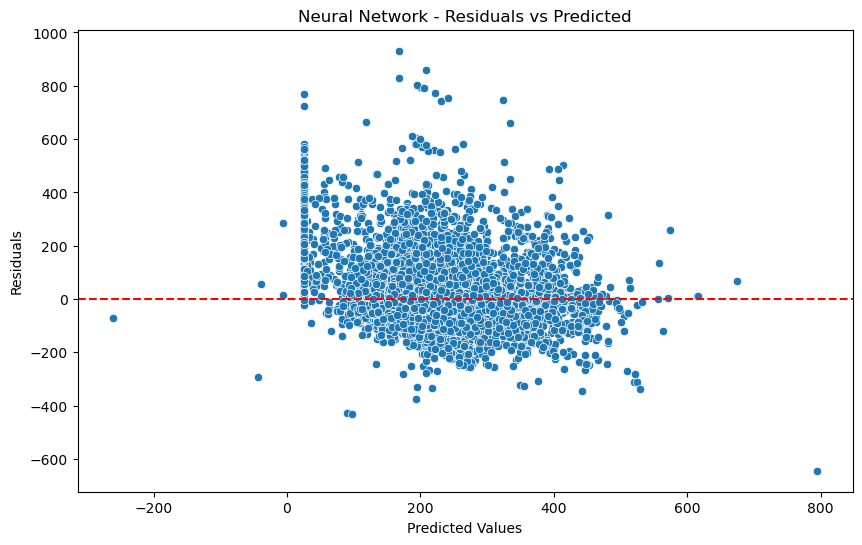

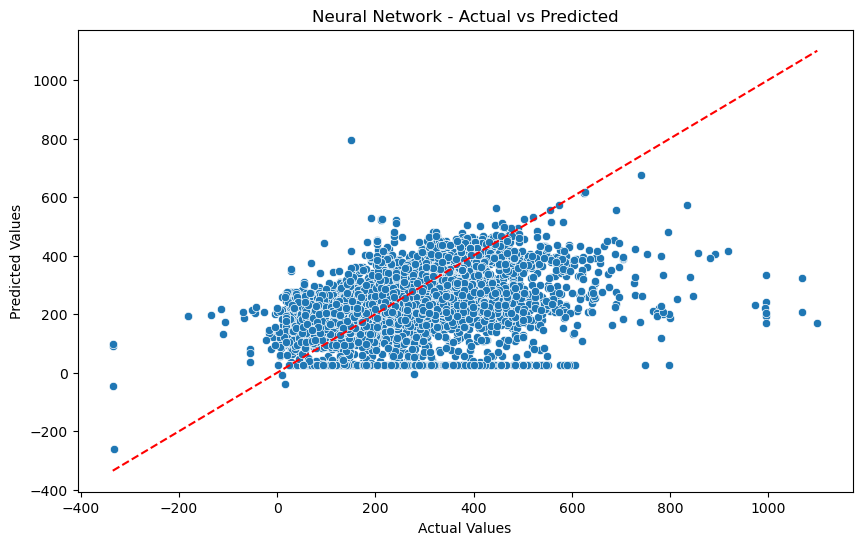

KeyError: 'R²'

In [38]:
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import pandas as pd



class DataPreprocessor:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self):
        # Load your data here
        self.data = pd.read_csv(self.file_path)

    def preprocess_data(self):
        # Preprocess your data here
        pass

    def get_processed_data(self):
        # Assume the last column is the target
        X = self.data.iloc[:, :-1]
        y = self.data.iloc[:, -1]
        return train_test_split(X, y, test_size=0.2, random_state=42)


def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{model_name} - Residuals vs Predicted')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()


def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()


def run_linear_regression(data):
    X_train, X_test, y_train, y_test = data
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Linear Regression Results")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

    plot_residuals(y_test, y_pred, "Linear Regression")
    plot_actual_vs_predicted(y_test, y_pred, "Linear Regression")


def run_random_forest(data):
    X_train, X_test, y_train, y_test = data
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Random Forest Regressor Results")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

    # Feature importance plot
    plt.figure(figsize=(10, 6))
    feature_importances = model.feature_importances_
    sns.barplot(x=feature_importances, y=X_train.columns)
    plt.title("Feature Importance - Random Forest")
    plt.show()

    plot_residuals(y_test, y_pred, "Random Forest Regressor")
    plot_actual_vs_predicted(y_test, y_pred, "Random Forest Regressor")


def run_gradient_boosting(data):
    X_train, X_test, y_train, y_test = data
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Gradient Boosting Regressor Results")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

    # Partial dependence plot using PartialDependenceDisplay
    fig, ax = plt.subplots(figsize=(8, 6))
    display = PartialDependenceDisplay.from_estimator(
        model, X_train, [0], ax=ax, grid_resolution=20
    )
    plt.title("Partial Dependence Plot")
    plt.show()  # Blocking plot

    # Residual and actual vs. predicted plots
    plot_residuals(y_test, y_pred, "Gradient Boosting Regressor")
    plot_actual_vs_predicted(y_test, y_pred, "Gradient Boosting Regressor")



from tensorflow.keras import Input

def run_neural_network(data):
    X_train, X_test, y_train, y_test = data

    # Define the neural network model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Explicit input layer
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

    # Train the model and capture the training history
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)

    # Predict on the test set
    y_pred = model.predict(X_test).flatten()

    # Evaluate and display metrics
    print("Neural Network Results")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

    # Plot the loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Curve - Neural Network")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show(block=False)

    # Plot the accuracy curve (MAE)
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title("Accuracy Curve (MAE) - Neural Network")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Absolute Error")
    plt.legend()
    plt.show(block=False)

    # Plot residuals and actual vs predicted values
    plot_residuals(y_test, y_pred, "Neural Network")
    plot_actual_vs_predicted(y_test, y_pred, "Neural Network")
    

def compare_models(data):
    # Collect results from all models
    results = []
    results.append(run_linear_regression(data))
    results.append(run_random_forest(data))
    results.append(run_gradient_boosting(data))
    results.append(run_neural_network(data))

    # Convert results to DataFrame for comparison
    df_results = pd.DataFrame(results)
    best_model = df_results.loc[df_results["R²"].idxmax()]

    print("\n=== Model Comparison ===")
    print(df_results)
    print(f"\nBest Model: {best_model['Model']} (R²: {best_model['R²']:.2f})")


def main_menu():
    processed_data = DataPreprocessor(file_path="df_cleaned.csv")
    processed_data.load_data()
    processed_data.preprocess_data()

    while True:
        print("\n=== Model Selection ===")
        print("1. Linear Regression")
        print("2. Random Forest Regressor")
        print("3. Gradient Boosting Regressor")
        print("4. Neural Network")
        print("5. Compare All Models")
        print("6. Quit")

        choice = input("Choose a model (1-6): ")

        if choice == "1":
            run_linear_regression(processed_data.get_processed_data())
        elif choice == "2":
            run_random_forest(processed_data.get_processed_data())
        elif choice == "3":
            run_gradient_boosting(processed_data.get_processed_data())
        elif choice == "4":
            run_neural_network(processed_data.get_processed_data())
        elif choice == "5":
            compare_models(processed_data.get_processed_data())
        elif choice == "6":
            print("Exiting. Goodbye.")
            break
        else:
            print("Invalid choice. Please try again.")


if __name__ == "__main__":
    main_menu()